In [9]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

In [2]:
def read_text_files_into_dataframe(data_folder):
    """
    Function reads text files from specified data folder and saves them as dataframe

    Args:
        data_folder - path to folder with text data
    """

    texts = []  # List to store the text data
    labels = []  # List to store the corresponding labels
    split = [] # List to store information about split

    # For each file in the data folder
    for file_name in os.listdir(data_folder):

        # Specify whether it is training or test part
        split_name = 'train' if file_name.startswith('training') else 'test'

        file_path = os.path.join(data_folder, file_name)

        # Read from text file
        with open(file_path, 'r', encoding='utf-8') as file:
            if file_name.endswith('text.txt'):
                read_texts = file.read().split("\n")
                texts = texts + read_texts
                split = split + [split_name] * len(read_texts)

            elif file_name.endswith('tags.txt'):
                labels = labels + file.read().split("\n")
            
            else:
                raise Exception("Not implemented error!")
            
       
    # Create a pandas DataFrame
    df = pd.DataFrame({'text': texts, 'label': labels, 'split': split})
    
    return df

In [3]:
# Create dataframe with text data
df = read_text_files_into_dataframe("data")

# Get train and test data
train, test = df.loc[df.split == 'train', ['text', 'label']], df.loc[df.split == 'train', ['text', 'label']]

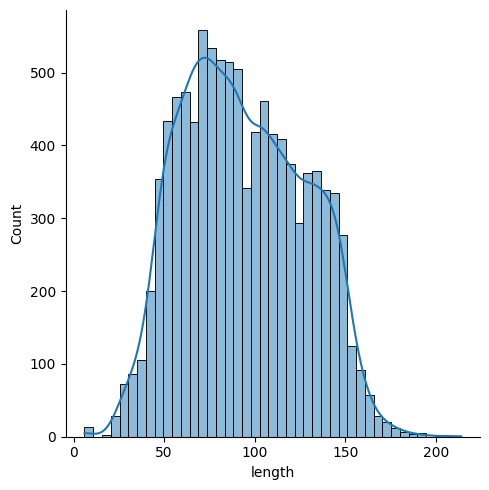

In [10]:
train['length'] = train.text.apply(lambda row: len(row))
sns.displot(train.length, kde=True)
plt.show()

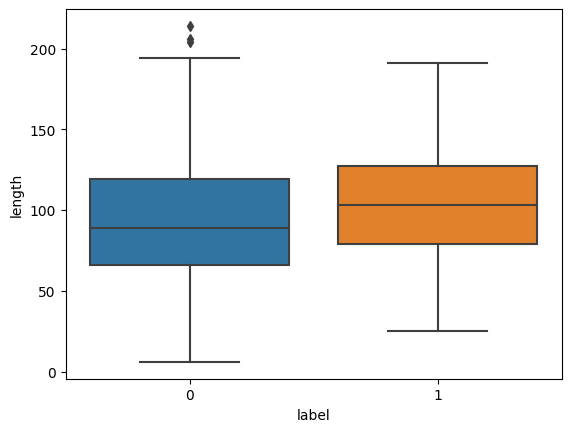

In [13]:
sns.boxplot(y='length', x='label', data=train)
plt.show()

In [28]:
train['n_of_mentions'] = train.text.str.count("@anonymized_account")

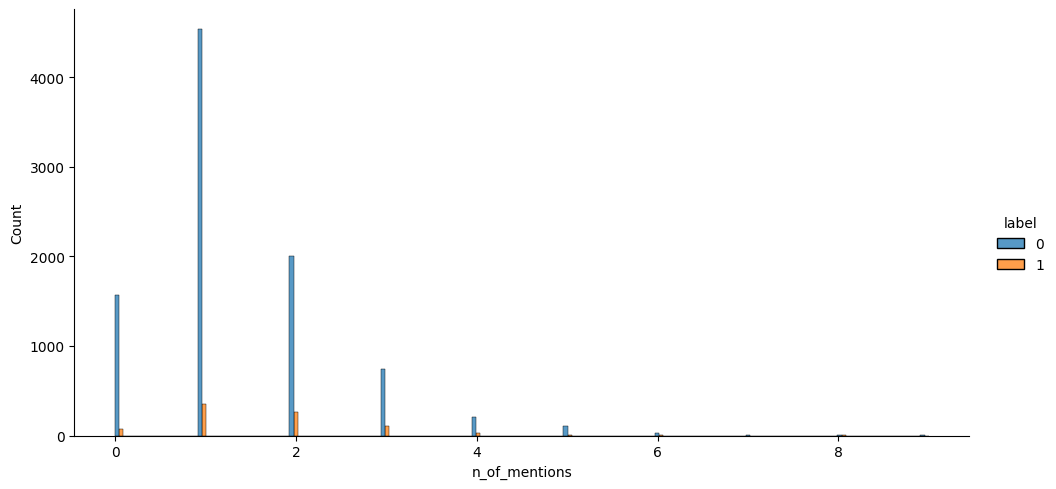

In [43]:
sns.displot(data=train, x='n_of_mentions', kde=False, hue='label', multiple='dodge', aspect=2)
plt.show()

In [44]:
train

,text,label,length,n_of_mentions
1000,Dla mnie faworytem do tytułu będzie Cracovia. ...,0,78,0
1001,@anonymized_account @anonymized_account Brawo ...,0,82,2
1002,"@anonymized_account @anonymized_account Super,...",0,125,2
1003,@anonymized_account @anonymized_account Musi. ...,0,67,2
1004,"Odrzut natychmiastowy, kwaśna mina, mam problem",0,47,0
...,...,...,...,...
11036,@anonymized_account Ty zagrasz? Nie wiedziałem 😉,0,48,1
11037,@anonymized_account @anonymized_account A VAR ...,0,149,2
11038,@anonymized_account @anonymized_account Szanow...,0,81,2
11039,@anonymized_account @anonymized_account @anony...,0,132,3


In [85]:
pl_letters = 'a ą b c ć d e ę f g h i j k l ł m n ń o ó p q r s ś t u v w x y z ź ż'

In [86]:
train['is_emoji'] = train.text.apply(lambda row: all([True if c.encode() not in pl_letters.encode().split() else False for c in row.split()]))

In [87]:
train

,text,label,length,n_of_mentions,is_emoji
1000,Dla mnie faworytem do tytułu będzie Cracovia. ...,0,78,0,False
1001,@anonymized_account @anonymized_account Brawo ...,0,82,2,True
1002,"@anonymized_account @anonymized_account Super,...",0,125,2,False
1003,@anonymized_account @anonymized_account Musi. ...,0,67,2,False
1004,"Odrzut natychmiastowy, kwaśna mina, mam problem",0,47,0,False
...,...,...,...,...,...
11036,@anonymized_account Ty zagrasz? Nie wiedziałem 😉,0,48,1,False
11037,@anonymized_account @anonymized_account A VAR ...,0,149,2,False
11038,@anonymized_account @anonymized_account Szanow...,0,81,2,False
11039,@anonymized_account @anonymized_account @anony...,0,132,3,True


In [73]:
train[train.index == 11036].text.values[0]

'@anonymized_account Ty zagrasz? Nie wiedziałem 😉'

In [95]:
[[letter in c.encode() for letter in pl_letters.encode().split() for c in train[train.index == 11036].text.values[0].split()]

[[True,
  False,
  False,
  True,
  False,
  True,
  True,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  True,
  True,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  True,
  False,
  False,
  False,
  True,
  True,
  False,
  False],
 [False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False],
 [True,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  False],
 [False,
  False,
  False,
  False,
  False,
  False,
  True,
  False,

In [93]:
pl_letters.encode().split()

[b'a',
 b'\xc4\x85',
 b'b',
 b'c',
 b'\xc4\x87',
 b'd',
 b'e',
 b'\xc4\x99',
 b'f',
 b'g',
 b'h',
 b'i',
 b'j',
 b'k',
 b'l',
 b'\xc5\x82',
 b'm',
 b'n',
 b'\xc5\x84',
 b'o',
 b'\xc3\xb3',
 b'p',
 b'q',
 b'r',
 b's',
 b'\xc5\x9b',
 b't',
 b'u',
 b'v',
 b'w',
 b'x',
 b'y',
 b'z',
 b'\xc5\xba',
 b'\xc5\xbc']

In [81]:
pl_letters = 'a ą b c ć d e ę f g h i j k l ł m n ń o ó p q r s ś t u v w x y z ź ż'
pl_letters.encode().split()

[b'a',
 b'\xc4\x85',
 b'b',
 b'c',
 b'\xc4\x87',
 b'd',
 b'e',
 b'\xc4\x99',
 b'f',
 b'g',
 b'h',
 b'i',
 b'j',
 b'k',
 b'l',
 b'\xc5\x82',
 b'm',
 b'n',
 b'\xc5\x84',
 b'o',
 b'\xc3\xb3',
 b'p',
 b'q',
 b'r',
 b's',
 b'\xc5\x9b',
 b't',
 b'u',
 b'v',
 b'w',
 b'x',
 b'y',
 b'z',
 b'\xc5\xba',
 b'\xc5\xbc']